## Sentiment classification

We will be using Stanford Sentiment Treebank as the datasource and perform sentiment classification

In [49]:
!pip install google_trans_new

import random
import google_trans_new
from google_trans_new import google_translator 

def random_insertion(sentence, n): 
    words = remove_stopwords(sentence) 
    for _ in range(n):
        new_synonym = get_synonyms(random.choice(words))
        sentence.insert(randrange(len(sentence)+1), new_synonym) 
    return sentence

def random_swap(sentence, n=5): 
    length = range(len(sentence)) 
    for _ in range(n):
        idx1, idx2 = random.sample(length, 2)
        sentence[idx1], sentence[idx2] = sentence[idx2], sentence[idx1] 
    return sentence

def random_deletion(words, p=0.5): 
    if len(words) == 1: # return if single word
        return words
    remaining = list(filter(lambda x: random.uniform(0,1) > p,words)) 
    if len(remaining) == 0: # if not left, sample a random word
        return [random.choice(words)] 
    else:
        return remaining

In [73]:
random_deletion('I am good boy'.split())

['am', 'boy']

In [23]:
!pip install pytreebank
!pip install hyperopt

In [24]:
!pip install flair allennlp

In [25]:
from flair.datasets import ClassificationCorpus
from flair.embeddings import FlairEmbeddings, DocumentRNNEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from flair.training_utils import EvaluationMetric
from flair.visual.training_curves import Plotter
from flair.data_fetcher import NLPTaskDataFetcher
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentLSTMEmbeddings
from flair.trainers import ModelTrainer
from pathlib import Path
from flair.data import Sentence

In [27]:
# import pytreebank
# import sys
# import os


# out_path = os.path.join(sys.path[0], 'sst_{}.txt')
# dataset = pytreebank.load_sst()

# # Store train, dev and test in separate files
# for category in ['train', 'test', 'dev']:
#     with open(out_path.format(category), 'w') as outfile:
#         for item in dataset[category]:
#             outfile.write("__label__{}\t{}\n".format(
#                 item.to_labeled_lines()[0][0] + 1,
#                 item.to_labeled_lines()[0][1]
#             ))

In [9]:
# import pytreebank
# # load the sentiment treebank corpus in the parenthesis format,
# # e.g. "(4 (2 very ) (3 good))"
# dataset = pytreebank.load_sst()
# # add Javascript and CSS to the Ipython notebook
# pytreebank.LabeledTree.inject_visualization_javascript()
# # select and example to visualize
# example = dataset["train"][0]
# # display it in the page
# example.display()

In [114]:
train, dev, test = 'sst_train.txt','sst_dev.txt','sst_test.txt'
corpus = ClassificationCorpus(
        '/content/',
        train_file=train,
        dev_file=dev,
        test_file=test,
    )

2021-06-03 18:07:12,291 Reading data from /content
2021-06-03 18:07:12,294 Train: /content/sst_train.txt
2021-06-03 18:07:12,296 Dev: /content/sst_dev.txt
2021-06-03 18:07:12,298 Test: /content/sst_test.txt


In [115]:
word_embeddings = [WordEmbeddings('glove'), FlairEmbeddings('news-forward-fast'), FlairEmbeddings('news-backward-fast')]

In [116]:
document_embeddings = DocumentRNNEmbeddings(word_embeddings, hidden_size=512, reproject_words=True, reproject_words_dimension=256)

In [117]:
classifier = TextClassifier(document_embeddings, label_dictionary=corpus.make_label_dictionary(), multi_label=False)

2021-06-03 18:07:16,727 Computing label dictionary. Progress:



100%|██████████| 10754/10754 [00:06<00:00, 1613.90it/s]

2021-06-03 18:07:23,848 [b'4', b'5', b'3', b'2', b'1']


In [119]:
trainer = ModelTrainer(classifier, corpus)

In [120]:
# without data augmentation
trainer.train('./', max_epochs=90)

2021-06-03 18:07:36,920 ----------------------------------------------------------------------------------------------------
2021-06-03 18:07:36,922 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=2148, out_features=256, bias=True)
    (rnn): GRU(256, 512, ba

{'dev_loss_history': [1.8895463943481445,
  1.5292648077011108,
  1.5026493072509766,
  1.5123043060302734,
  1.434011697769165,
  1.45767343044281,
  1.4453024864196777,
  1.3718746900558472,
  1.4912729263305664,
  1.3686164617538452,
  1.3659861087799072,
  1.3922005891799927,
  1.321976661682129,
  1.385625958442688,
  1.3068249225616455,
  1.3438165187835693,
  1.3014328479766846,
  1.3628509044647217,
  1.2833856344223022,
  1.2830673456192017,
  1.2812750339508057,
  1.2966969013214111,
  1.2966302633285522,
  1.2599409818649292,
  1.2963993549346924,
  1.2949364185333252,
  1.251914143562317,
  1.2412278652191162,
  1.24015474319458,
  1.2801177501678467,
  1.2486207485198975,
  1.2619365453720093,
  1.2472915649414062,
  1.2523921728134155,
  1.2374622821807861,
  1.2548518180847168,
  1.231776475906372,
  1.253846526145935,
  1.2420426607131958,
  1.2441121339797974,
  1.2491366863250732,
  1.2370116710662842,
  1.2394758462905884,
  1.24481999874115,
  1.2629224061965942,
  

In [2]:
# plotter = Plotter()
# plotter.plot_training_curves('/content/loss.tsv')

In [ ]:
# CONFUSION MATRIX - GENERATION

In [16]:
classifier = TextClassifier.load('/content/best-model.pt')

2021-06-03 06:20:02,721 loading file /content/best-model.pt


In [17]:
sentence = Sentence("Steers turns in a snappy screenplay that curls at the edges ; it 's so clever you want to hate it .")
classifier.predict(sentence)
print(sentence.labels)

[4 (0.4502)]


In [18]:
sentence = Sentence("An utterly compelling ` who wrote it ' in which the reputation of the most famous author who ever lived comes into question  .")
classifier.predict(sentence)
print(sentence.labels)

[5 (0.3889)]


In [19]:
sentence = Sentence("Very great movie, worth watching 100 times")
classifier.predict(sentence)
print(sentence.labels)

[5 (0.5575)]


In [20]:
sentence = Sentence("Worst movie ever. I could never understand whats going on")
classifier.predict(sentence)
print(sentence.labels)

[1 (0.427)]


In [21]:
sentence = Sentence("It all started on high note but the suspense started dropping towards the end")
classifier.predict(sentence)
print(sentence.labels)

[2 (0.3711)]


In [22]:
sentence = Sentence("A disturbing and frighteningly evocative assembly of imagery and hypnotic music composed by Philip Glass .")
classifier.predict(sentence)
print(sentence.labels)

[5 (0.7684)]


In [12]:
sentence = Sentence("The story loses its bite in a last-minute happy ending that 's even less plausible than the rest of the picture .")
classifier.predict(sentence)
print(sentence.labels)

In [31]:
import pandas as pd
df_train = pd.read_csv('/content/sst_train.txt', sep='\t', header=None, names=['Labels', 'text'])
df_train['Labels'] = df_train['Labels'].str.replace('__label__', '')
df_train['Labels'] = df_train['Labels'].astype(int).astype('category')

print(df_train.head())
print(df_train.Labels.value_counts(sort=False))

  Labels                                               text
0      4  The Rock is destined to be the 21st Century 's...
1      5  The gorgeously elaborate continuation of `` Th...
2      4  Singer/composer Bryan Adams contributes a slew...
3      3  You 'd think by now America would have had eno...
4      4               Yet the act is still charming here .
1    1092
2    2218
3    1624
4    2322
5    1288
Name: Labels, dtype: int64


In [93]:
# with data augmentation
## Perform data augmentation on train data frame
# Random Delete
# Random Swap
# Back Translate (facing issue - too many requests)

from tqdm import tqdm
import random
from sklearn.utils import shuffle
import numpy as np
# Augmenting  data basis class distribution (class with less samples will have higher % of augmentation samples)
# Augmenting size

samples_1=int(df_train['Labels'].value_counts()[0]*.4)
samples_2=int(df_train['Labels'].value_counts()[1]*.2)
samples_3=int(df_train['Labels'].value_counts()[2]*.3)
samples_4=int(df_train['Labels'].value_counts()[3]*.2)
samples_5=int(df_train['Labels'].value_counts()[4]*.4)


    
##selecting the class samples
df_1=df_train[df_train.Labels==1].reset_index(drop=True)
df_2=df_train[df_train.Labels==2].reset_index(drop=True)
df_3=df_train[df_train.Labels==3].reset_index(drop=True)
df_4=df_train[df_train.Labels==4].reset_index(drop=True)
df_5=df_train[df_train.Labels==5].reset_index(drop=True)

## Random Delete ####

new_text=[]
## data augmentation loop - class 1
for i in tqdm(np.random.randint(0,len(df_1),samples_1)):
  text = df_1.iloc[i]['text'].split()
  augmented_text = ' '.join(random_deletion(text,0.1))
  new_text.append(augmented_text)
## dataframe
rd_new_1=pd.DataFrame({'text':new_text,'Labels':1})

new_text=[]
## data augmentation loop - class 2
for i in tqdm(np.random.randint(0,len(df_2),samples_2)):
  text = df_2.iloc[i]['text'].split()
  augmented_text = ' '.join(random_deletion(text,0.1))
  new_text.append(augmented_text)
## dataframe
rd_new_2=pd.DataFrame({'text':new_text,'Labels':2})

new_text=[]
## data augmentation loop - class 3
for i in tqdm(np.random.randint(0,len(df_3),samples_3)):
  text = df_3.iloc[i]['text'].split()
  augmented_text = ' '.join(random_deletion(text,0.1))
  new_text.append(augmented_text)
## dataframe
rd_new_3=pd.DataFrame({'text':new_text,'Labels':3})

new_text=[]
## data augmentation loop - class 4
for i in tqdm(np.random.randint(0,len(df_4),samples_4)):
  text = df_4.iloc[i]['text'].split()
  augmented_text = ' '.join(random_deletion(text,0.1))
  new_text.append(augmented_text)
## dataframe
rd_new_4=pd.DataFrame({'text':new_text,'Labels':4})

new_text=[]
## data augmentation loop - class 4
for i in tqdm(np.random.randint(0,len(df_5),samples_5)):
  text = df_5.iloc[i]['text'].split()
  augmented_text = ' '.join(random_deletion(text,0.1))
  new_text.append(augmented_text)
## dataframe
rd_new_5=pd.DataFrame({'text':new_text,'Labels':5})

print('\n',rd_new_1.shape,rd_new_2.shape,rd_new_3.shape,rd_new_4.shape,rd_new_5.shape)


## Random Swap ####

new_text=[]
## data augmentation loop - class 1
for i in tqdm(np.random.randint(0,len(df_1),samples_1)):
  text = df_1.iloc[i]['text'].split()
  if len(text)>=2:
    augmented_text = ' '.join(random_swap(text))
  new_text.append(augmented_text)
## dataframe
rs_new_1=pd.DataFrame({'text':new_text,'Labels':1})

new_text=[]
## data augmentation loop - class 2
for i in tqdm(np.random.randint(0,len(df_2),samples_2)):
  text = df_2.iloc[i]['text'].split()
  if len(text)>=2:
    augmented_text = ' '.join(random_swap(text))
  new_text.append(augmented_text)
## dataframe
rs_new_2=pd.DataFrame({'text':new_text,'Labels':2})

new_text=[]
## data augmentation loop - class 3
for i in tqdm(np.random.randint(0,len(df_3),samples_3)):
  text = df_3.iloc[i]['text'].split()
  if len(text)>=2:
    augmented_text = ' '.join(random_swap(text))
  new_text.append(augmented_text)
## dataframe
rs_new_3=pd.DataFrame({'text':new_text,'Labels':3})

new_text=[]
## data augmentation loop - class 4
for i in tqdm(np.random.randint(0,len(df_4),samples_4)):
  text = df_4.iloc[i]['text'].split()
  if len(text)>=2:
    augmented_text = ' '.join(random_swap(text))
  new_text.append(augmented_text)
## dataframe
rs_new_4=pd.DataFrame({'text':new_text,'Labels':4})

new_text=[]
## data augmentation loop - class 5
for i in tqdm(np.random.randint(0,len(df_5),samples_5)):
  text = df_5.iloc[i]['text'].split()
  if len(text)>=2:
    augmented_text = ' '.join(random_swap(text))
  new_text.append(augmented_text)
## dataframe
rs_new_5=pd.DataFrame({'text':new_text,'Labels':5})



print('\n',rs_new_1.shape,rs_new_2.shape,rs_new_3.shape,rs_new_4.shape,rs_new_5.shape)


## Back Translate ####

# translator=google_translator()
# available_langs = list(google_trans_new.LANGUAGES.keys()) 

# new_text=[]
# ## data augmentation loop - class 1
# for i in tqdm(np.random.randint(0,len(df_1),100)):
#   trans_lang = random.choice(available_langs)
#   text = df_1.iloc[i]['text']
#   translations=translator.translate(text, lang_tgt=trans_lang)
#   augmented_text=translator.translate(translations, lang_src=trans_lang, lang_tgt='en')
#   new_text.append(augmented_text)
# ## dataframe
# bt_new_1=pd.DataFrame({'text':new_text,'Labels':1})

# new_text=[]
# ## data augmentation loop - class 2
# for i in tqdm(np.random.randint(0,len(df_2),50)):
#   trans_lang = random.choice(available_langs)
#   text = df_2.iloc[i]['text']
#   translations=translator.translate(text, lang_tgt=trans_lang)
#   augmented_text=translator.translate(translations, lang_src=trans_lang, lang_tgt='en')
#   new_text.append(augmented_text)
# ## dataframe
# bt_new_2=pd.DataFrame({'text':new_text,'Labels':2})

# new_text=[]
# ## data augmentation loop - class 3
# for i in tqdm(np.random.randint(0,len(df_3),50)):
#   trans_lang = random.choice(available_langs)
#   text = df_3.iloc[i]['text']
#   translations=translator.translate(text, lang_tgt=trans_lang)
#   augmented_text=translator.translate(translations, lang_src=trans_lang, lang_tgt='en')
#   new_text.append(augmented_text)
# ## dataframe
# bt_new_3=pd.DataFrame({'text':new_text,'Labels':3})

# new_text=[]
# ## data augmentation loop - class 4
# for i in tqdm(np.random.randint(0,len(df_4),50)):
#   trans_lang = random.choice(available_langs)
#   text = df_4.iloc[i]['text']
#   translations=translator.translate(text, lang_tgt=trans_lang)
#   augmented_text=translator.translate(translations, lang_src=trans_lang, lang_tgt='en')
#   new_text.append(augmented_text)
# ## dataframe
# bt_new_4=pd.DataFrame({'text':new_text,'Labels':4})

# new_text=[]
# ## data augmentation loop - class 5
# for i in tqdm(np.random.randint(0,len(df_5),100)):
#   trans_lang = random.choice(available_langs)
#   text = df_5.iloc[i]['text']
#   translations=translator.translate(text, lang_tgt=trans_lang)
#   augmented_text=translator.translate(translations, lang_src=trans_lang, lang_tgt='en')
#   new_text.append(augmented_text)
# ## dataframe
# bt_new_5=pd.DataFrame({'text':new_text,'Labels':5})


# print('\n',bt_new_1.shape,bt_new_2.shape,bt_new_3.shape, bt_new_4.shape, bt_new_5.shape)





100%|██████████| 928/928 [00:00<00:00, 1471.76it/s]

100%|██████████| 443/443 [00:00<00:00, 1505.11it/s]

100%|██████████| 487/487 [00:00<00:00, 1440.84it/s]

100%|██████████| 257/257 [00:00<00:00, 1514.21it/s]

100%|██████████| 436/436 [00:00<00:00, 1496.16it/s]

 31%|███       | 284/928 [00:00<00:00, 1427.76it/s]


 (928, 2) (443, 2) (487, 2) (257, 2) (436, 2)



100%|██████████| 928/928 [00:00<00:00, 1398.27it/s]

100%|██████████| 443/443 [00:00<00:00, 1363.03it/s]

100%|██████████| 487/487 [00:00<00:00, 1382.43it/s]

100%|██████████| 257/257 [00:00<00:00, 1439.91it/s]

100%|██████████| 436/436 [00:00<00:00, 1375.06it/s]


 (928, 2) (443, 2) (487, 2) (257, 2) (436, 2)


In [95]:
rs_new_1.head()

,text,Labels
0,( Lee ) unassuming his audience the same treat...,1
1,Viewers will need all they luck the this muste...,1
2,machine terrorists to wonder if just some Hopk...,1
3,. awful Thoroughly,1
4,Bears is than worse . even imagined a ever mov...,1


In [102]:
df_train_new=shuffle(df_train.append([rd_new_1,rd_new_2,rd_new_3,rd_new_4,rd_new_5,rs_new_1,rs_new_2,rs_new_3,rs_new_4,rs_new_5]).reset_index(drop=True)).reset_index(drop=True)
print('\n',df_train.head(),'\n',df_train_new.head(),'\n',df_train.shape,'\n', df_train_new.shape )



   Labels                                               text
0      4  The Rock is destined to be the 21st Century 's...
1      5  The gorgeously elaborate continuation of `` Th...
2      4  Singer/composer Bryan Adams contributes a slew...
3      3  You 'd think by now America would have had eno...
4      4               Yet the act is still charming here . 
    Labels                                               text
0       3  From beginning to end , this overheated melodr...
1       1  Master of Disguise runs for only 71 minutes an...
2       4  Argento , at only 26 , brings a youthful , out...
3       3  How I Killed My Father would be a rarity in Ho...
4       5  Features what is surely the funniest and most ... 
 (8544, 2) 
 (13646, 2)


In [104]:
df_train_new['Labels']=df_train_new['Labels'].apply(lambda x: '__label__'+ str(x))

In [109]:
df_train_new.sethead()

,Labels,text
0,__label__3,"From beginning to end , this overheated melodr..."
1,__label__1,Master of Disguise runs for only 71 minutes an...
2,__label__4,"Argento , at only 26 , brings a youthful , out..."
3,__label__3,How I Killed My Father would be a rarity in Ho...
4,__label__5,Features what is surely the funniest and most ...


In [110]:
df_train_new.set_index('Labels').to_csv('/content/sst_train_augmented.txt', sep='\t', header=None)

In [ ]:
# After data augmentation in train sample

In [112]:
train, dev, test = 'sst_train_augmented.txt','sst_dev.txt','sst_test.txt'
corpus_new = ClassificationCorpus(
        '/content/',
        train_file=train,
        dev_file=dev,
        test_file=test,
    )

2021-06-03 16:26:12,447 Reading data from /content
2021-06-03 16:26:12,451 Train: /content/sst_train_augmented.txt
2021-06-03 16:26:12,453 Dev: /content/sst_dev.txt
2021-06-03 16:26:12,455 Test: /content/sst_test.txt


2021-06-03 16:26:46,445 Computing label dictionary. Progress:



100%|██████████| 15856/15856 [00:09<00:00, 1697.91it/s]

2021-06-03 16:26:56,091 [b'3', b'1', b'4', b'5', b'2']
2021-06-03 16:26:56,100 ----------------------------------------------------------------------------------------------------
2021-06-03 16:26:56,101 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=2148, o

2021-06-03 16:26:56,133 Model training base path: "."
2021-06-03 16:26:56,136 ----------------------------------------------------------------------------------------------------
2021-06-03 16:26:56,142 Device: cuda:0
2021-06-03 16:26:56,146 ----------------------------------------------------------------------------------------------------
2021-06-03 16:26:56,148 Embeddings storage mode: cpu
2021-06-03 16:26:56,154 ----------------------------------------------------------------------------------------------------
2021-06-03 16:27:04,775 epoch 1 - iter 42/427 - loss 1.62218262 - samples/sec: 164.13 - lr: 0.100000
2021-06-03 16:27:12,850 epoch 1 - iter 84/427 - loss 1.61524338 - samples/sec: 187.70 - lr: 0.100000
2021-06-03 16:27:20,340 epoch 1 - iter 126/427 - loss 1.61150726 - samples/sec: 198.96 - lr: 0.100000
2021-06-03 16:27:27,950 epoch 1 - iter 168/427 - loss 1.60776693 - samples/sec: 195.50 - lr: 0.100000
2021-06-03 16:27:34,811 epoch 1 - iter 210/427 - loss 1.60213575 - sample

No handles with labels found to put in legend.


Loss and F1 plots are saved in /content/training.png


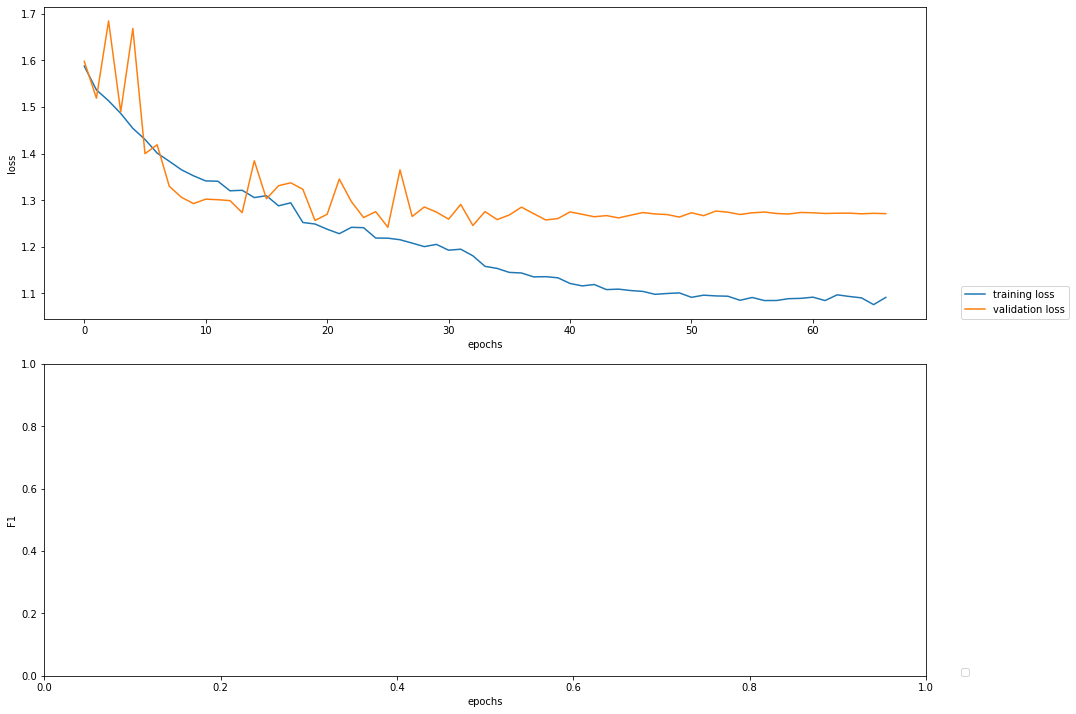

In [113]:
word_embeddings = [WordEmbeddings('glove'), FlairEmbeddings('news-forward-fast'), FlairEmbeddings('news-backward-fast')]
document_embeddings = DocumentRNNEmbeddings(word_embeddings, hidden_size=512, reproject_words=True, reproject_words_dimension=256)
classifier_new = TextClassifier(document_embeddings, label_dictionary=corpus.make_label_dictionary(), multi_label=False)
trainer_new = ModelTrainer(classifier_new, corpus_new)
# with train data augmentation
trainer_new.train('./', max_epochs=90)
plotter = Plotter()
plotter.plot_training_curves('/content/loss.tsv')